In [32]:
import numpy as np
from pylab import *
from scipy.stats import norm
import matplotlib.pyplot as plt


In [33]:
#return vector that represent devation from mean of datapoint
def devation_from_mean(a_vectorList):
    
    #calculate mean of datapoint
    mean_of_datapoint=mean(a_vectorList)
    
    #go through each datapoint in the list and substract datpoint from the mean and create another list
    return [datapoint-mean_of_datapoint for datapoint in a_vectorList]

In [34]:
def covariance(a_vector,b_vector):
    
    length_of_vector=len(a_vector)
    
    a_devation_from_mean_vector=devation_from_mean(a_vector)
    b_devation_from_mean_vector=devation_from_mean(b_vector)
    
     #Basically we treat each variable as a vector of deviations from the mean, and compute the "dot product" 
     #of both vectors. 
     #Geometrically this can be thought of as the angle between the two vectors in a high-dimensional
     #space, but you can just think of it as a measure of similarity between the two variables.
    return dot(a_devation_from_mean_vector,b_devation_from_mean_vector)/length_of_vector-1

In [35]:
#For example, let's say we work for an e-commerce company, and they are interested in finding a correlation between
#page speed (how fast each web page renders for a customer) and how much a customer spends.

#First, let's just make page speed and purchase amount totally random and independent of each other; 
#a very small covariance will result as there is no real correlation:

#generating normally distrubuted random data
pageSpeed=np.random.normal(3.0,1.0,1000)
purchaseAmount = np.random.normal(50.0,10.0,1000)

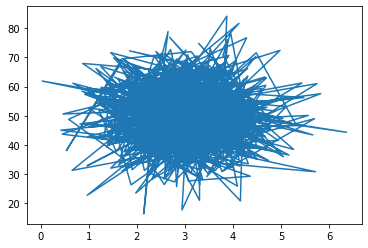

In [36]:
plt.plot(pageSpeed,purchaseAmount)

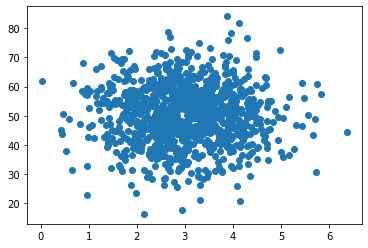

In [37]:
scatter(pageSpeed, purchaseAmount)

In [38]:
##a very small covariance will result as there is no real correlation:
covariance(pageSpeed,purchaseAmount)

-0.9722325925601741

In [39]:
#Now we'll make our fabricated purchase amounts an actual function of page speed, making a very real correlation.
#making purchaseAmount function of pageSpeed
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeed

-12.917921299873793

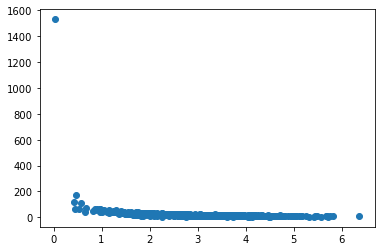

In [41]:
scatter(pageSpeed, purchaseAmount)
#The negative value indicates an inverse relationship; pages that render in less time result in more money spent:
covariance (pageSpeed, purchaseAmount)

In [42]:
#But, what does this value mean? Covariance is sensitive to the units used in the variables, which makes it difficult to interpret. 
#Correlation normalizes everything by their standard deviations, giving you an easier to understand value that ranges 
#from -1 (for a perfect inverse correlation) to 1 (for a perfect positive correlation):


In [46]:
def corelation(a_vector,b_vector):
    stddev_a_vector=a_vector.std()
    stddev_b_vector=b_vector.std()
    return covariance(a_vector,b_vector)/(stddev_a_vector * stddev_b_vector)

In [47]:
#Correlation normalizes everything by their standard deviations, giving you an easier to understand value that ranges 
#from -1 (for a perfect inverse correlation) to 1 (for a perfect positive correlation):
corelation(pageSpeed,purchaseAmount)

-0.28036399177805077

In [48]:
#umpy can do all this for you with numpy.corrcoef. It returns a matrix of the correlation coefficients between every combination of the arrays passed in:

np.corrcoef(pageSpeed,purchaseAmount)

array([[ 1.       , -0.2586605],
       [-0.2586605,  1.       ]])

In [49]:
#We can force a perfect correlation by fabricating a totally linear relationship
#making purchaseAmount function of pageSpeed
purchaseAmount = 100-pageSpeed*3

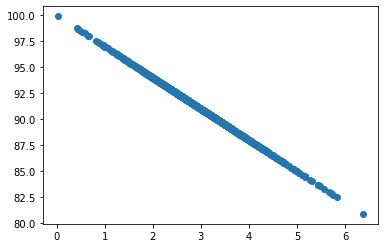

In [50]:
scatter(pageSpeed,purchaseAmount)

In [51]:
corelation(pageSpeed,purchaseAmount)

-1.3775310518076287

In [52]:
np.corrcoef(pageSpeed,purchaseAmount)

array([[ 1., -1.],
       [-1.,  1.]])

In [53]:
#calculation co-varience
np.cov(pageSpeed,purchaseAmount)

array([[ 0.88381339, -2.65144018],
       [-2.65144018,  7.95432055]])

zsh:1: command not found: conda
